In [2]:
import tensorflow

In [22]:
import sys
!{sys.executable} -m pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25854 sha256=6323424984a4b55c56f50a24eef172b3e3f19579c210de82e49cfe8320990f08
  Stored in directory: c:\users\omhot\appdata\local\pip\cache\wheels\31\d0\2c\87ce38f6052879e5b7b18f0f8b4a10ad2a9d210e908d449f16
Successfully built imutils


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import ndimage


In [4]:
def shows(i):
    cv2.imshow('original', i)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [55]:
img = cv2.imread("../Data/Frames/road_detection/frames/1028.png")
test = cv2.imread("../Data/driver_182_30frame/05312336_0004.MP4/00000.jpg")
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

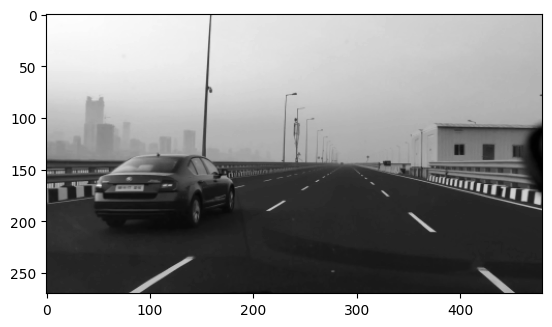

In [10]:
plt.imshow(img1,cmap="gray")

__Cannys edge detection__

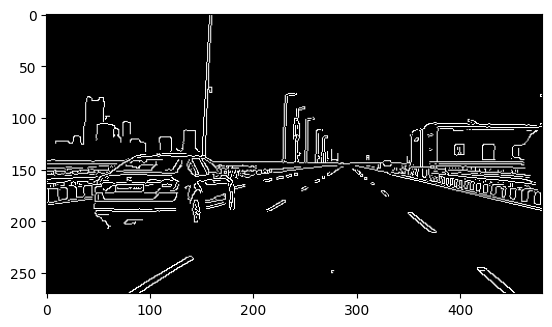

In [12]:
canny = cv2.Canny(img,50,100)
plt.imshow(canny,cmap="gray")


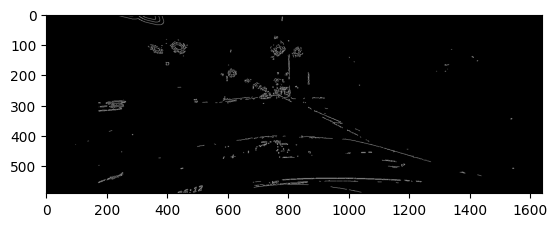

In [17]:
canny = cv2.Canny(test,90,150)
plt.imshow(canny,cmap="gray")

Waterfill

In [21]:
water = cv2.watershed(img,)
plt.imshow(water,cmap="gray")

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'watershed'
> Overload resolution failed:
>  - watershed() missing required argument 'markers' (pos 2)
>  - watershed() missing required argument 'markers' (pos 2)


In [34]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img =test
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

In [35]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

In [36]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

In [37]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [38]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

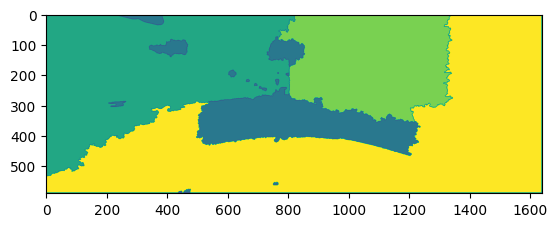

In [39]:
plt.imshow(markers)

edge sobeling

In [41]:
from skimage.color import rgb2gray

gray = rgb2gray(img1)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')


[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [42]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')

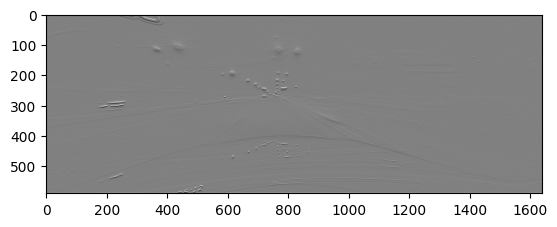

In [43]:
plt.imshow(out_h, cmap='gray')

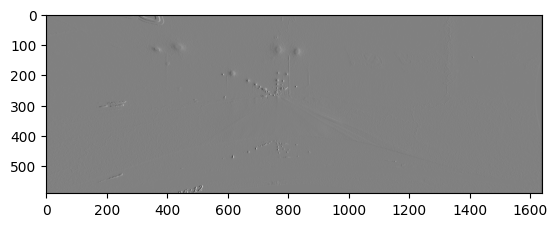

In [44]:
plt.imshow(out_v, cmap='gray')


[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


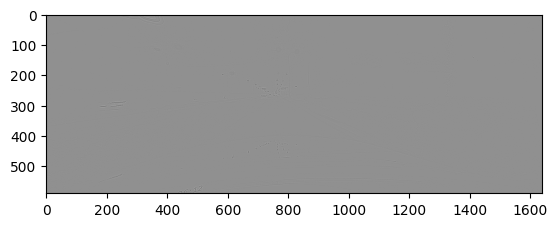

Hough

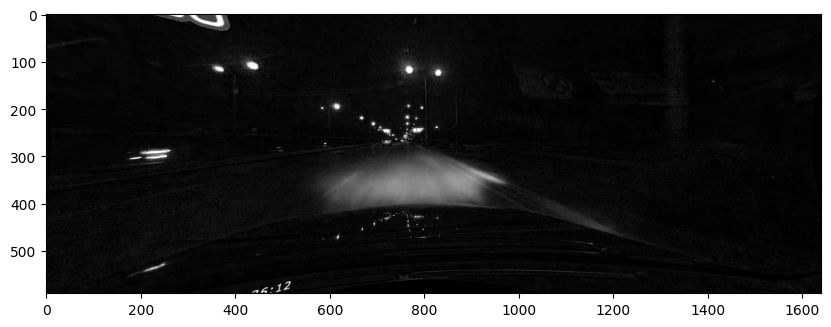

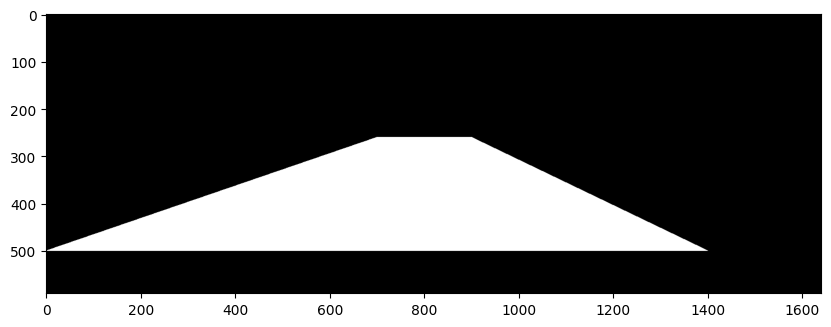

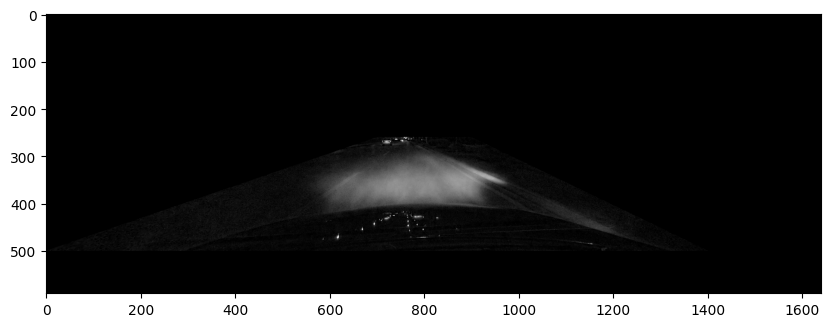

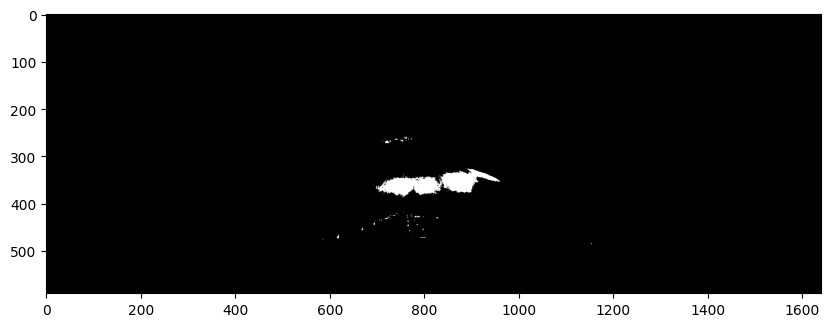

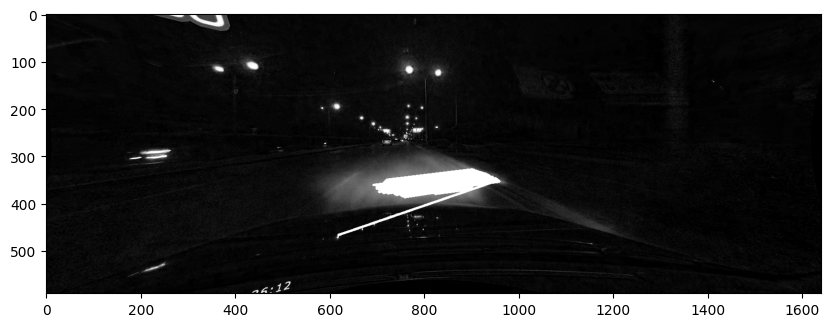

In [52]:
plt.figure(figsize=(10,10))
plt.imshow(img1[:,:,0], cmap= "gray")
plt.show()

stencil = np.zeros_like(img1[:,:,0])

# specify coordinates of the polygon
polygon = np.array([[0,500], [700,260], [900,260], [1400,500]])

# fill polygon with ones
cv2.fillConvexPoly(stencil, polygon, 1)

# plot polygon
plt.figure(figsize=(10,10))
plt.imshow(stencil, cmap= "gray")
plt.show()

# apply polygon as a mask on the frame
img = cv2.bitwise_and(test[:,:,0], test[:,:,0], mask=stencil)

# plot masked frame
plt.figure(figsize=(10,10))
plt.imshow(img, cmap= "gray")
plt.show()

ret, thresh = cv2.threshold(img, 130, 145, cv2.THRESH_BINARY)

# plot image
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap= "gray")
plt.show()

lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)

# create a copy of the original frame
dmy = test[:,:,0].copy()

# draw Hough lines
for line in lines:
  x1, y1, x2, y2 = line[0]
  cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(dmy, cmap= "gray")
plt.show()
